In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = [
("An exhilarating and unforgettable experience","Positive"),
("A disappointing and confusing mess","Negative"),
("Brilliant performances and stunning cinematography","Positive"),
("A boring and uninspired film","Negative"),
("A beautifully crafted story that tugs at the heartstrings","Positive"),
("Terribly acted and poorly directed","Negative"),
("A groundbreaking film in the sci-fi genre","Positive"),
("An uninteresting plot with flat characters","Negative"),
("A cinematic triumph that is not to be missed","Positive"),
("A waste of time and money","Negative"),
("An exceptional film that exceeds all expectations","Positive"),
("A film that fails on every level","Negative"),
("An overrated and underwhelming movie","Negative"),
("A masterpiece of storytelling and acting","Positive"),
("A predictable and dull experience","Negative"),
("A tragic love story with stunning visuals","Positive"),
("An exhilarating and unforgettable experience","Positive"),
("A disappointing and confusing mess","Negative"),
("An exceptional film that exceeds all expectations","Positive"),
("A waste of time and money","Negative"),
]

In [4]:
reviews,sentiments = zip(*data)

In [5]:
reviews

('An exhilarating and unforgettable experience',
 'A disappointing and confusing mess',
 'Brilliant performances and stunning cinematography',
 'A boring and uninspired film',
 'A beautifully crafted story that tugs at the heartstrings',
 'Terribly acted and poorly directed',
 'A groundbreaking film in the sci-fi genre',
 'An uninteresting plot with flat characters',
 'A cinematic triumph that is not to be missed',
 'A waste of time and money',
 'An exceptional film that exceeds all expectations',
 'A film that fails on every level',
 'An overrated and underwhelming movie',
 'A masterpiece of storytelling and acting',
 'A predictable and dull experience',
 'A tragic love story with stunning visuals',
 'An exhilarating and unforgettable experience',
 'A disappointing and confusing mess',
 'An exceptional film that exceeds all expectations',
 'A waste of time and money')

In [6]:
sentiments

('Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative')

In [7]:
tokenize=Tokenizer()

In [8]:
tokenize.fit_on_texts(reviews)

In [9]:
seq=tokenize.texts_to_sequences(reviews)
seq

[[3, 8, 1, 9, 6],
 [2, 10, 1, 11, 12],
 [24, 25, 1, 13, 26],
 [2, 27, 1, 28, 4],
 [2, 29, 30, 14, 5, 31, 32, 15, 33],
 [34, 35, 1, 36, 37],
 [2, 38, 4, 39, 15, 40, 41, 42],
 [3, 43, 44, 16, 45, 46],
 [2, 47, 48, 5, 49, 50, 51, 52, 53],
 [2, 17, 7, 18, 1, 19],
 [3, 20, 4, 5, 21, 22, 23],
 [2, 4, 5, 54, 55, 56, 57],
 [3, 58, 1, 59, 60],
 [2, 61, 7, 62, 1, 63],
 [2, 64, 1, 65, 6],
 [2, 66, 67, 14, 16, 13, 68],
 [3, 8, 1, 9, 6],
 [2, 10, 1, 11, 12],
 [3, 20, 4, 5, 21, 22, 23],
 [2, 17, 7, 18, 1, 19]]

In [10]:
vocab_size=len(tokenize.word_index)+1
vocab_size

69

In [11]:
tokenize.word_index

{'and': 1,
 'a': 2,
 'an': 3,
 'film': 4,
 'that': 5,
 'experience': 6,
 'of': 7,
 'exhilarating': 8,
 'unforgettable': 9,
 'disappointing': 10,
 'confusing': 11,
 'mess': 12,
 'stunning': 13,
 'story': 14,
 'the': 15,
 'with': 16,
 'waste': 17,
 'time': 18,
 'money': 19,
 'exceptional': 20,
 'exceeds': 21,
 'all': 22,
 'expectations': 23,
 'brilliant': 24,
 'performances': 25,
 'cinematography': 26,
 'boring': 27,
 'uninspired': 28,
 'beautifully': 29,
 'crafted': 30,
 'tugs': 31,
 'at': 32,
 'heartstrings': 33,
 'terribly': 34,
 'acted': 35,
 'poorly': 36,
 'directed': 37,
 'groundbreaking': 38,
 'in': 39,
 'sci': 40,
 'fi': 41,
 'genre': 42,
 'uninteresting': 43,
 'plot': 44,
 'flat': 45,
 'characters': 46,
 'cinematic': 47,
 'triumph': 48,
 'is': 49,
 'not': 50,
 'to': 51,
 'be': 52,
 'missed': 53,
 'fails': 54,
 'on': 55,
 'every': 56,
 'level': 57,
 'overrated': 58,
 'underwhelming': 59,
 'movie': 60,
 'masterpiece': 61,
 'storytelling': 62,
 'acting': 63,
 'predictable': 64,
 'd

In [12]:
max_length=max([len(s) for s in seq])
max_length

9

In [13]:
padded_seq=sequence.pad_sequences(seq,maxlen=max_length,padding="post")
padded_seq

array([[ 3,  8,  1,  9,  6,  0,  0,  0,  0],
       [ 2, 10,  1, 11, 12,  0,  0,  0,  0],
       [24, 25,  1, 13, 26,  0,  0,  0,  0],
       [ 2, 27,  1, 28,  4,  0,  0,  0,  0],
       [ 2, 29, 30, 14,  5, 31, 32, 15, 33],
       [34, 35,  1, 36, 37,  0,  0,  0,  0],
       [ 2, 38,  4, 39, 15, 40, 41, 42,  0],
       [ 3, 43, 44, 16, 45, 46,  0,  0,  0],
       [ 2, 47, 48,  5, 49, 50, 51, 52, 53],
       [ 2, 17,  7, 18,  1, 19,  0,  0,  0],
       [ 3, 20,  4,  5, 21, 22, 23,  0,  0],
       [ 2,  4,  5, 54, 55, 56, 57,  0,  0],
       [ 3, 58,  1, 59, 60,  0,  0,  0,  0],
       [ 2, 61,  7, 62,  1, 63,  0,  0,  0],
       [ 2, 64,  1, 65,  6,  0,  0,  0,  0],
       [ 2, 66, 67, 14, 16, 13, 68,  0,  0],
       [ 3,  8,  1,  9,  6,  0,  0,  0,  0],
       [ 2, 10,  1, 11, 12,  0,  0,  0,  0],
       [ 3, 20,  4,  5, 21, 22, 23,  0,  0],
       [ 2, 17,  7, 18,  1, 19,  0,  0,  0]])

In [14]:
labels=np.array([1 if i=="Positive" else 0 for i in sentiments])
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [15]:
model = Sequential([
    Embedding(vocab_size,32,input_length=max_length),
    SimpleRNN(32),
    Dense(1,activation="sigmoid")
])

In [16]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [17]:
model.fit(padded_seq,labels,epochs=30,verbose=1)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8000 - loss: 0.6737
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8000 - loss: 0.6537
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8500 - loss: 0.6334
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9000 - loss: 0.6125
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9500 - loss: 0.5907
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9500 - loss: 0.5680
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9500 - loss: 0.5442
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.5194
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.4934
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.4663
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.4382
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 0.4092
Epo

In [19]:
import matplotlib.pyplot as plt

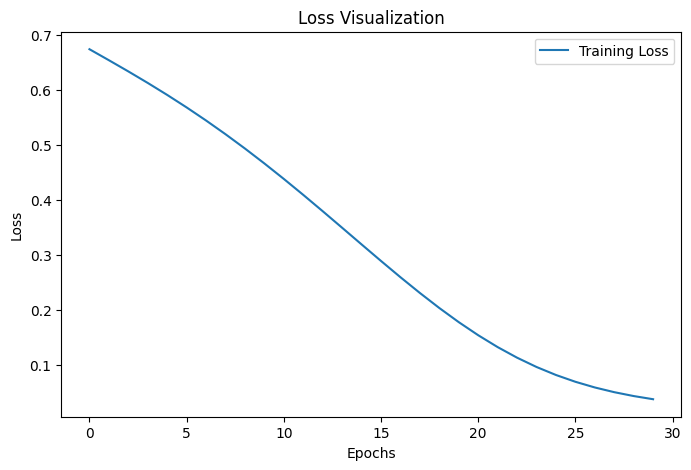

In [20]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history["loss"],label="Training Loss")
plt.legend()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

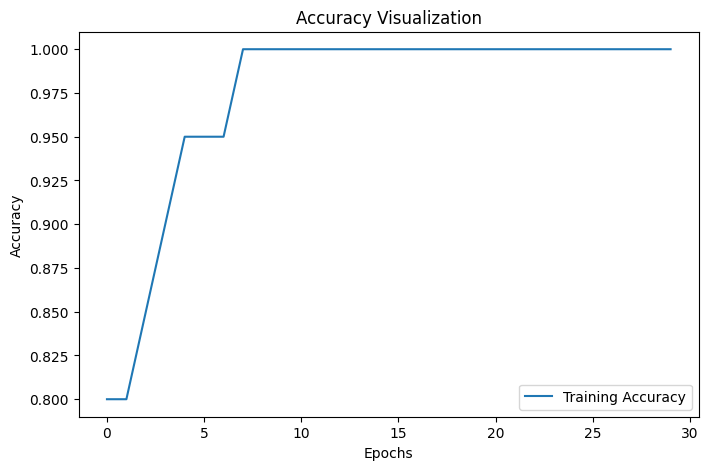

In [21]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history["accuracy"],label="Training Accuracy")
plt.legend()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [22]:
new_sentiment = "The cinematography was stunning,the film is masterpiece,a must-watch"

In [23]:
new_seq = tokenize.texts_to_sequences([new_sentiment])
new_seq

[[15, 26, 13, 15, 4, 49, 61, 2]]

In [24]:
new_padded_seq = sequence.pad_sequences(new_seq,maxlen=max_length,padding="post")
new_padded_seq

array([[15, 26, 13, 15,  4, 49, 61,  2,  0]])

In [25]:
prediction = model.predict(new_padded_seq)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [26]:
sentiment = "Positive" if prediction>=0.5 else "Negative"
sentiment

'Positive'

In [27]:
def sentiment_analyzer(sentiment):
    new_seq = tokenize.texts_to_sequences([sentiment])
    new_padded_seq = sequence.pad_sequences(new_seq,maxlen=max_length,padding="post")
    prediction = model.predict(new_padded_seq)
    sentiment = "Positive" if prediction >=0.5 else "Negative"
    return sentiment

In [28]:
sentiment_analyzer("I could'nt stand watching it,a complete waste of time.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'Negative'

In [29]:
sentiment_analyzer("It was a superb movie.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


'Negative'